In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

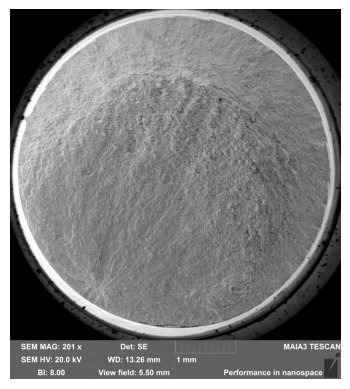

In [42]:
# Read the image
img = cv2.imread('C:\\Users\\yoni mazin\\Downloads\\images\\P1MF16_C_01.tif',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # color conversion from rgb to grayscale
_, width = gray.shape # '.shape' retrieve tuple which represent height and width. the underscore
                      # "_" is used to discard the height information
plt.axis('off') # hide the axis of the plot
plt.imshow(img)
plt.show()
# we need the two last lines of code because 'plt.imshow(img)' is like prepare the content that we want to display
# and 'plt.show()' is to actually display this content

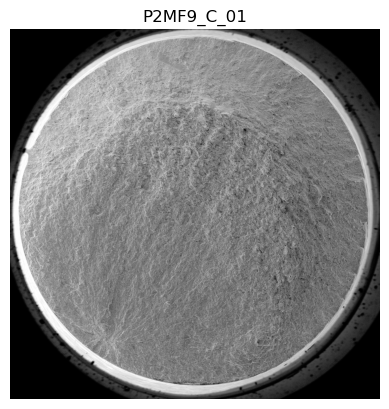

In [43]:
# Remove bottom bar
image = img[0:width, 0:width]
gray = gray[0:width, 0:width]
plt.axis('off')
plt.imshow(image)
plt.title('P2MF9_C_01')
plt.show()

In [44]:
image.shape

(4096, 4096, 3)

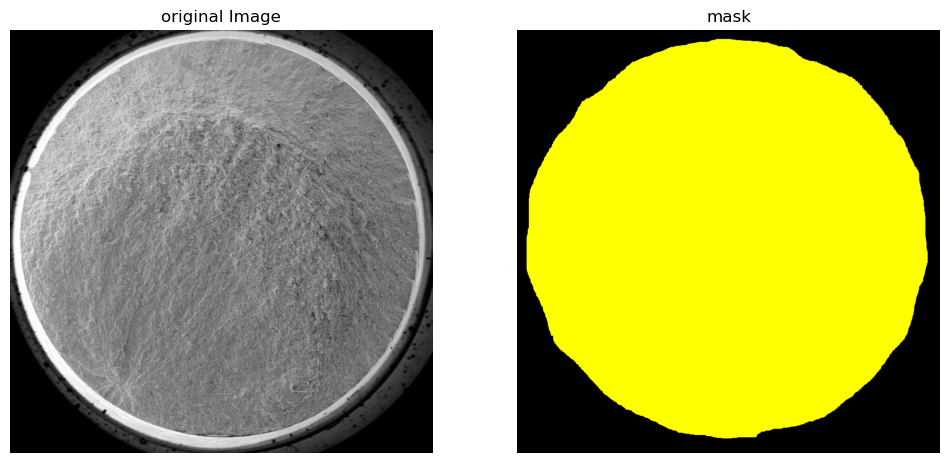

Image with contour saved to C:\Users\yoni mazin\Downloads\new\mask_for_external_contour\train\P3MF16_C.jpg 


In [269]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#image = img 

# create a copy of the image for drawing points.
image_copy = image.copy()

# initialize variables to store points and drawing state
contour_points = []
drawing = False

# a function for mouse event.
def draw_contour(event, x, y, flags, param):
    global contour_points, drawing, image_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        contour_points = [(x, y)]
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        # increase the circle size to make the points more bold.
        cv2.circle(image_copy, (x, y), 15, (0, 255, 255), -1)
        contour_points.append((x, y))

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)  
cv2.setMouseCallback("Image", draw_contour)

while True:
    cv2.imshow("Image", image_copy)
    cv2.resizeWindow("Image", 750, 750)  # Set the window size to 10x10 inches
    key = cv2.waitKey(1) & 0xFF
    if key == ord("c"):
        break

cv2.destroyAllWindows()

# Create a mask with the contour
mask = np.zeros_like(image)
if len (contour_points) >= 2:
    points = np.array(contour_points, np.int32)
    cv2.fillPoly(mask, [points], (0, 255, 255))

# Save the image with contour
output_path = "C:\\Users\\yoni mazin\\Downloads\\new\\mask_for_external_contour\\train\\P3MF16_C.jpg " 
result_image = cv2.addWeighted(image, 1, mask, 0.5, 0)
cv2.imwrite(output_path, mask)

# subplot with two image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("original Image")
axes[0].axis("off")

# display only the mask on the right
axes[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
axes[1].set_title("mask")
axes[1].axis("off")

plt.show()

print(f"Image with contour saved to {output_path}")


now we want to extract the contour and the mask

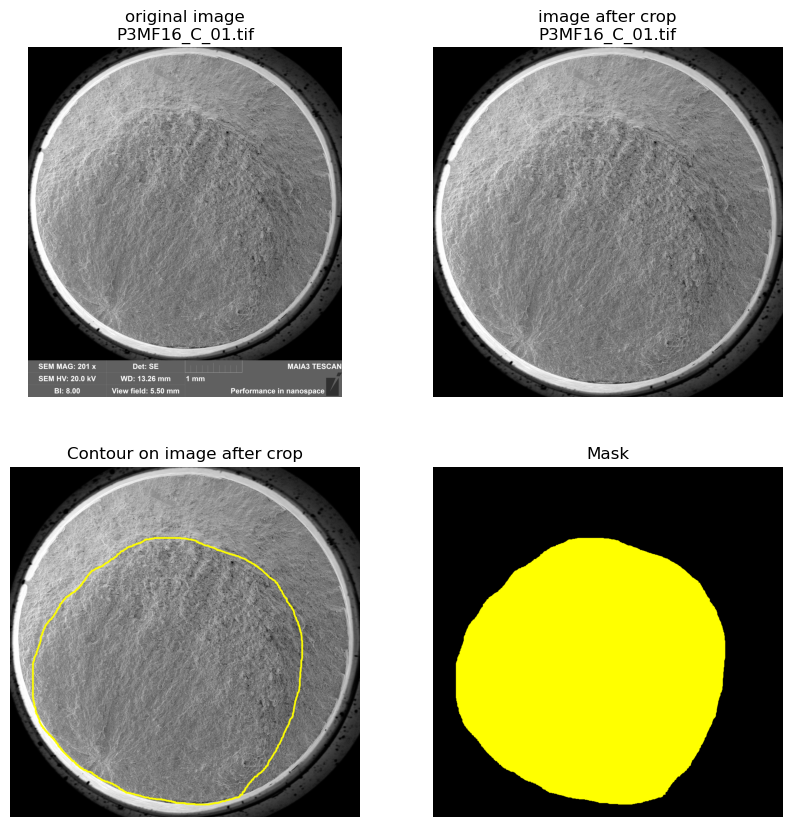

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


image_copy = image.copy()
contour_points = []
drawing = False

def draw_contour(event, x, y, flags, param):
    global contour_points, drawing, image_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        contour_points = [(x, y)]
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(image_copy, (x, y), 15, (0, 255, 255), -1)
        contour_points.append((x, y))

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Image", draw_contour)

while True:
    cv2.imshow("Image", image_copy)
    cv2.resizeWindow("Image", 750, 750)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("c"):
        break

cv2.destroyAllWindows()

mask = np.zeros_like(image)
if len(contour_points) >= 2:
    points = np.array(contour_points, np.int32)
    cv2.fillPoly(mask, [points], (0, 255, 255))
    
    
# Save the image with contour
output_path = "C:\\Users\\yoni mazin\\Downloads\\mask images\\P3MF16_C.jpg " 
result_image = cv2.addWeighted(image, 1, mask, 0.5, 0)
cv2.imwrite(output_path, mask)    

# Create a subplot with three images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display the original image
axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title(f"original image\n{os.path.basename(r'C:/Users/yoni mazin/Downloads/images/P3MF16_C_01.tif')}")
axes[0, 0].axis("off")

# Display the original image
axes[0, 1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title(f"image after crop\n{os.path.basename(r'C:/Users/yoni mazin/Downloads/images/P3MF16_C_01.tif')}")
axes[0, 1].axis("off")

# Display the contour on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, [points], -1, (0, 255, 255), 20)
axes[1, 0].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title("Contour on image after crop")
axes[1, 0].axis("off")

# Display the mask
axes[1, 1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title("Mask")
axes[1, 1].axis("off")

plt.show()


what to do with "P1MF6_C_01", "P1MF8_N_01", "P1MF19_N_01", "P1MF20_N_01", "P2MF2_N_01", "P2MF9_C_01", 


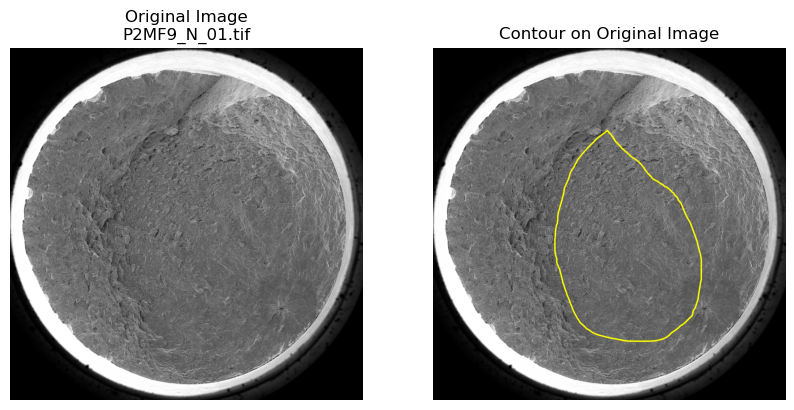

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image = img 
image_copy = image.copy()
contour_points = []
drawing = False

def draw_contour(event, x, y, flags, param):
    global contour_points, drawing, image_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        contour_points = [(x, y)]
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(image_copy, (x, y), 15, (0, 255, 255), -1)
        contour_points.append((x, y))

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Image", draw_contour)

while True:
    cv2.imshow("Image", image_copy)
    cv2.resizeWindow("Image", 750, 750)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("c"):
        break

cv2.destroyAllWindows()

mask = np.zeros_like(image)
if len(contour_points) >= 2:
    points = np.array(contour_points, np.int32)
    cv2.fillPoly(mask, [points], (0, 255, 255))

# Create a subplot with three images
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Display the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title(f"Original Image\n{os.path.basename(r'C:/Users/yoni mazin/Downloads/images/P2MF9_N_01.tif')}")
axes[0].axis("off")

# Display the contour on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, [points], -1, (0, 255, 255), 16)
axes[1].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Contour on Original Image")
axes[1].axis("off")

# Display the mask
#axes[2].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
#axes[2].set_title("Mask")
#axes[2].axis("off")

plt.show()
